<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/notebooks/Lab_1.Data_generation_and_visualization_for_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data generation and visualization for regression and classification

**Goal**: generate synthetic data for both regression and classification tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data generation: regression, linear
============================

Model is $y=wx + ɛ$ with $\varepsilon \sim \mathcal{N}(0, \sigma)$

In [2]:
def datagen(d, points, m, M, w, sigma):
    """
    Parameters
    ----------
    d : int
        Dimension of each data sample
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    w : float array of dim d
        Vector of weights of the linear model
    sigma : float
        Standard deviation of the noise eps
    """
    X = np.zeros((points, d))
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    eps = np.random.normal(0, sigma, points)
    y = np.dot(X, w) + eps
    return X, y

The given Python code defines a function called `datagen` that generates random data points for a linear regression model with some added noise. Here's an explanation of what the code does:

1. An empty array `X` is created with dimensions `(points, d)` to store the generated data points. Each row of this array represents a data sample, and each column represents a feature.

2. A `for` loop iterates over each data point to be generated (`points` iterations).

3. Inside the loop, a random data sample is generated and assigned to the `i`-th row of the `X` array. This random sample is generated using `np.random.uniform(m, M, d)`, which generates `n*d` random values within the range `[m, M]` for each feature of the data point.

4. An array `eps` of random noise is generated using `np.random.normal(0, sigma, points)`. This array has the same length as the number of data points and represents random noise with a normal distribution and the specified standard deviation `sigma`.

5. The target variable `y` is generated for each data point by taking the dot product of the data point `X[i]` and the weight vector `w`. Then, the corresponding noise value `eps[i]` is added to it. This simulates a linear regression model where the target variable is a linear combination of the features with some added Gaussian noise.

In [15]:
# usage example
d = 1
w = np.random.normal(0, 1, d)
sigma = 1
points = 100
m = -10
M = 10

X, y = datagen(d, points, m, M, w, sigma)

C:\Users\39346\AppData\Local\Temp\ipykernel_2516\3566943454.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


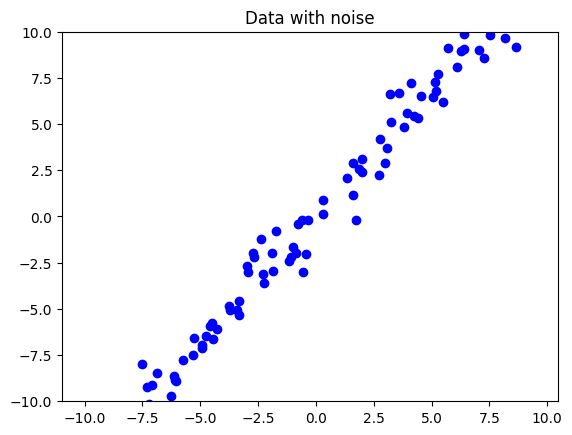

In [16]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data with noise')
plt.ylim([m, M])

fig.show()

1. Add different level of noise (how do you get noiseless data?) and interpolating line to the plot

C:\Users\39346\AppData\Local\Temp\ipykernel_2516\2033595082.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


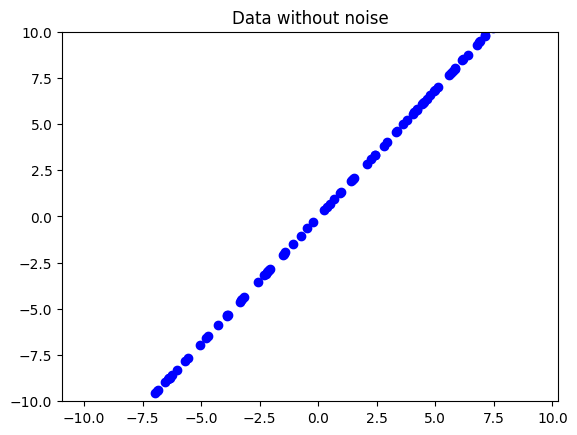

In [17]:
X, y = datagen(d, points, m, M, w, 0)

fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data without noise')
plt.ylim([m, M])

fig.show()

Data generation: classification
=========================

We want to generate  2D data for classification  in the form of 2 (or more) gaussian clouds with specific means and variances.

In [7]:
def mixGauss(means, sigmas, n):
    """
    Parameters
    ----------
    means : matrix/list of float of dim n_classes x dim_data (d)
        Means of the Gaussian functions
    sigmas : array/list of float of dim n_classes
        Standard deviation of the Gaussian functions
    n : int
        Number of points for each class
    """
    means = np.array(means)
    sigmas = np.array(sigmas)

    d = np.shape(means)[1] # the means matrix is of n_classes x dim_data
    num_classes = sigmas.size # the number of variances is the number of classes

    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    # iterate over classes
    for idx, sigma in enumerate(sigmas):
        # generates n points around means[idx] with cov sigma[idx]
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n:(idx + 1) * n] = idx

    if(num_classes == 2):
        labels[labels == 0] = -1

    return data, labels

The following code defines a Python function called `mixGauss` that generates data sampled from a mixture of Gaussian distributions.

1. The `means` and `sigmas` inputs are converted into NumPy arrays to facilitate further processing.

2. The variable `d` is initialized with the dimension of the data `dim_data` present in `means`. This value represents the number of dimensions of the data.

3. The variable `num_classes` is initialized with the size of `sigmas`, which represents the number of classes of Gaussian distributions.

4. An empty data matrix `data` is created with dimensions `(n * num_classes, d)` and filled with `np.inf` initially. This matrix will be used to store the generated data points.

5. An empty labels array `labels` is created with dimensions `n * num_classes` and initialized with zeros. This array will store the class labels for the generated data points.

6. The code iterates over the classes using a `for` loop with an index `idx` and the corresponding standard deviation `sigma` from the `sigmas` list.

7. Inside the loop, for each class, `n` data points are generated around the mean `means[idx]` with a covariance matrix of `np.eye(d) * sigmas[idx] ** 2`. The `np.random.multivariate_normal` function is used for this purpose. It generates random samples from a multivariate Gaussian distribution.

8. The generated data points are stored in the `data` array from index `idx * n` to `(idx + 1) * n`, and their labels are set in the `labels` array to the class index `idx`.

9. If there are only two classes (`num_classes == 2`), a special case is handled: the labels are converted such that all instances labeled as `0` are changed to `-1`. This is a common operation in binary classification tasks.

10. The function returns two arrays: `data`, which contains the generated data points, and `labels`, which contains the corresponding class labels.

In [49]:
# usage example
means = [[3,0],[0,6]]
sigmas = [0.9,0.9]
n = 100

X, labels = mixGauss(means, sigmas, n)

C:\Users\39346\AppData\Local\Temp\ipykernel_2516\2782586316.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


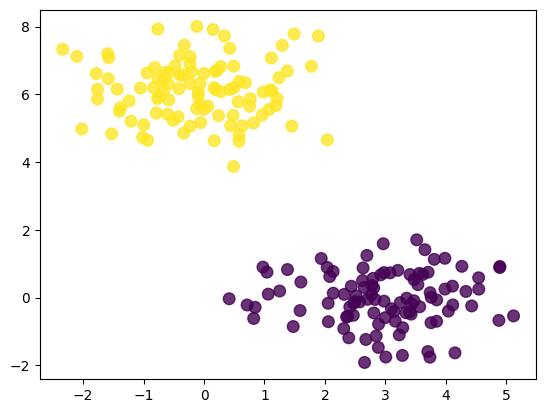

In [59]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8)
fig.show()

Label Noise
==========

Add some noise to the dataset for binary classification by randomly flipping some labels

In [34]:
def labelsnoise(perc, labels): # this version works only with binary classes
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    labels: array of int of dim n_classes
        Array containing labels idxs
    """
    points = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(points * perc / 100)) # floor: nearest integer by defect
    idx_to_flip = np.random.choice(points, size=n_flips, replace=False) # replace is false since the same index cannot be chosen twice
    noisylabels[idx_to_flip] = -noisylabels[idx_to_flip] # for binary this turns -1 into 1 and viceversa
    return noisylabels


The provided code defines a Python function called `labelsnoise` that introduces noise into a set of labels by flipping a specified percentage of them.

1. The number of data points, `points`, is determined by the length of the `labels` array using `np.shape(labels)[0]`.

2. A copy of the `labels` array is created and stored in the variable `noisylabels` using `np.copy(np.squeeze(labels))`. This copy will be modified to introduce noise without affecting the original `labels` array.

3. The number of labels to be flipped, `n_flips`, is calculated as an integer by flooring the result of `(points * perc / 100)`. This calculation determines how many labels will be flipped based on the specified percentage.

4. An array of random indices to flip, `idx_to_flip`, is generated using `np.random.choice(points, size=n_flips, replace=False)`. The `replace=False` argument ensures that the same index cannot be chosen more than once, avoiding duplicates.

5. The selected labels at the indices specified in `idx_to_flip` are flipped by changing their sign. For binary labels (e.g., -1 and 1), this operation turns `-1` into `1` and vice versa.

In [60]:
# usage example
noisylabels = labelsnoise(5, labels)
noisylabels

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

C:\Users\39346\AppData\Local\Temp\ipykernel_2516\1184726251.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


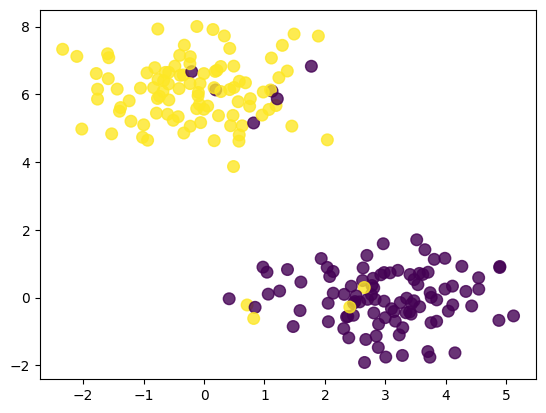

In [61]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisylabels, alpha=0.8)
fig.show()

Alternative for binary classification: linear
==================================

Generate a dataset for classification in which points are linearly separated, i.e. there exists a line $y = ax + b$ that separes the classes

In [62]:
def binary(a, b, points, m, M, d):
    """
    Parameters
    ----------
    a : float
        Angular coefficient (slope) of the separating line
    b : float
        Intercept of the separating line
    points : int
        Number of points to be generated
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    d : int
        Dimension of each data sample
    """
    X = np.zeros((points,d))
    labels = np.zeros(points)

    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)

    labels[X[:,1]-a*X[:,0]-b>=0] = 1
    labels[X[:,1]-a*X[:,0]-b<0] = -1
    return X, labels

The provided code defines a Python function called `binary` that generates data points for a binary classification problem based on a linear decision boundary.

1. An empty data matrix `X` is created with dimensions `(points, d)` to store the generated data points.

2. An empty labels array `labels` is created with dimensions `points` to store the class labels for the generated data points.

3. A `for` loop iterates over each data point to be generated (`points` iterations).

4. Inside the loop, for each data point, `d` random values are generated within the range `[m, M]` for each feature using `np.random.uniform(m, M, d)`. These random values represent the feature values of the data point, and they are assigned to the `i`-th row of the `X` array.

5. The class label for each data point is determined based on its position relative to the separating line defined by `a` and `b`. If the data point lies above the line (i.e., `X[:, 1] - a * X[:, 0] - b >= 0`), its label is set to `1`. If it lies below the line (i.e., `X[:, 1] - a * X[:, 0] - b < 0`), its label is set to `-1`. This effectively creates a binary classification problem where data points are separated into two classes based on their positions relative to the linear decision boundary.

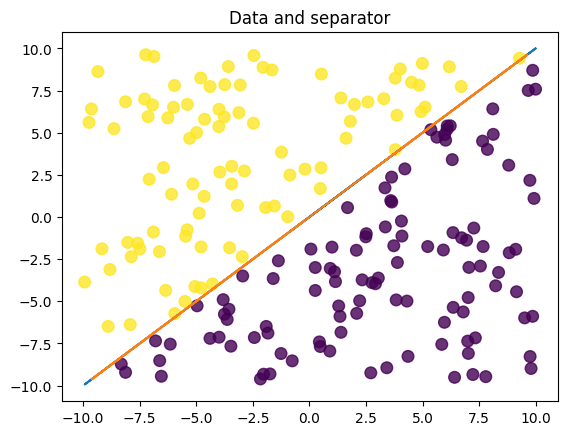

In [63]:
# usage example
a=1
b=0
d=2
points=200
m=-10
M=10

X,labels=binary(a,b,points,m,M,d)

# plotting the generated dataset
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(X,a*X+b)
ax.set_title('Data and separator')
plt.show()

Alternative for binary classification: non-linear
==============================================

Add some noise to the binary classification dataset by randomly flipping some labels;

Generate Binary classification datasets which are separated by non-linear functions.

In [64]:
def flipLabels(perc, Y):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

The provided code defines a Python function called `flipLabels` that introduces noise into a binary classification problem by flipping a specified percentage of class labels.

1. The code performs several checks on the input parameters to ensure they are valid and the operation can proceed safely.

2. A copy of the input labels array, `Y`, is created and stored in the variable `Y_noisy`. The `squeeze` function is used to remove dimensions of size 1, and `copy` ensures that the original array is not modified.

3. It checks if the dimension of the `Y_noisy` array is greater than 1 (i.e., it has more than one dimension). If the input array has more than one dimension, it prints an error message and returns `-1`.

4. The total number of data points, `n`, is determined based on the size of the `Y_noisy` array.

5. The number of labels to be flipped, `n_flips`, is calculated as an integer by flooring the result of `(n * perc / 100)`.

8. An array of random indices to flip, `idx_to_flip`, is generated using `np.random.choice(n, size=n_flips, replace=False)`.

9. The selected labels at the indices specified in `idx_to_flip` are flipped by changing their sign.

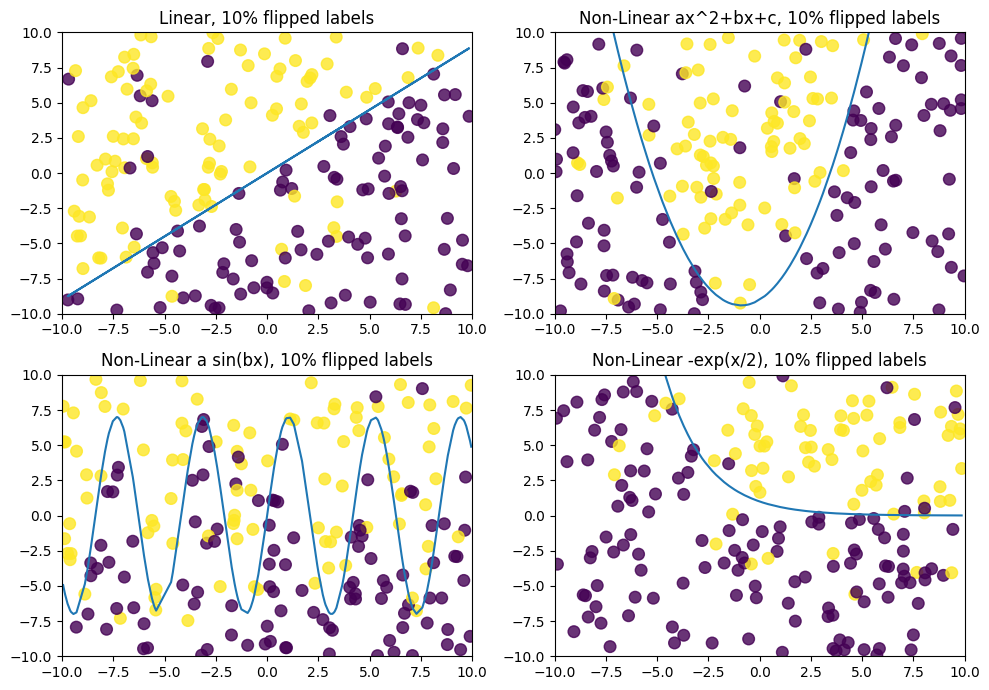

In [65]:
n = 200 # number of points per class
D = 2 # dimension of the points

fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)


# linear case
m = 0.9
q = 0

# bounds (assume they are the same for all dimensions)
low_D = -10
high_D = 10

X = np.zeros((n, D))
Y = np.zeros(n)

# sampling of the X
for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

# assigning the labels depending on the position of the sample with respect to the linear separator
Y[X[:,1] - (X[:,0] * m + q) > 0] = 1
Y[Y==0] = -1

# add some noise
Yn = flipLabels(10, Y)

# plot the samples and the separator
ax0.set_title("Linear, 10% flipped labels")
ax0.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax0.plot(X[:,0], X[:,0] * m + q)
ax0.set_xlim((low_D, high_D))
ax0.set_ylim((low_D, high_D))


# non-linear separators case 1

a = 0.5
b = 0.9
c = -9

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - (X[:,0]**2 * a + X[:,0]*b + c) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax1.set_title("Non-Linear ax^2+bx+c, 10% flipped labels")
ax1.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax1.plot(np.sort(X[:,0]), np.sort(X[:,0])**2 * a + np.sort(X[:,0])*b + c)
ax1.set_xlim((low_D, high_D))
ax1.set_ylim((low_D, high_D))

# non-linear case 2

alpha = 7
beta = 1.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - alpha*np.sin(beta*X[:,0]) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax2.set_title("Non-Linear a sin(bx), 10% flipped labels")
ax2.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax2.plot(np.sort(X[:,0]), alpha*np.sin(beta*np.sort(X[:,0])))
ax2.set_xlim((low_D, high_D))
ax2.set_ylim((low_D, high_D))

# non-linear case 3

alpha = 7
beta = 0.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)

Y[X[:,1] - np.exp(-X[:,0]/2) > 0] = 1
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax3.set_title("Non-Linear -exp(x/2), 10% flipped labels")
ax3.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax3.plot(np.sort(X[:,0]), np.exp(-np.sort(X[:,0]/2)))
ax3.set_xlim((low_D, high_D))
ax3.set_ylim((low_D, high_D))

plt.tight_layout()

More than 2 Gaussians
===================

Generate  2D data for (binary) classification  in the form of more than $2$ gaussian clouds with specific means and variances.

**Hint**: first generate the dataset with 4 classes, then transform the labels to get the binary labels... function `np.mod()` might be useful!

In [41]:
# usage of the np.mod() function
x = np.array([0, 2, 2, 1, 0, 3]) # array of 4 labels
y = np.mod(x, 2) # transform the labels so that they are now binary
print(y)

[0 0 0 1 0 1]


In [42]:
# from {0, 1} labels to {-1, 1} labels
z = 2 * y - 1
print(z)

[-1 -1 -1  1 -1  1]


In [43]:
# generate two datasets: binary (2 classes) and non binary (4 classes)
# classification with more than two gaussians
mu = [[0,0], [0,1], [1,1], [1,0]] # 4 classes, 2-dim points
sigma = [0.2, 0.2, 0.2, 0.2] # 4 classes
X, y = mixGauss(mu, sigma, 200)

# transform y so that it represents a binary classification problem for the same dataset
y_bin = 2 * np.mod(y, 2) - 1

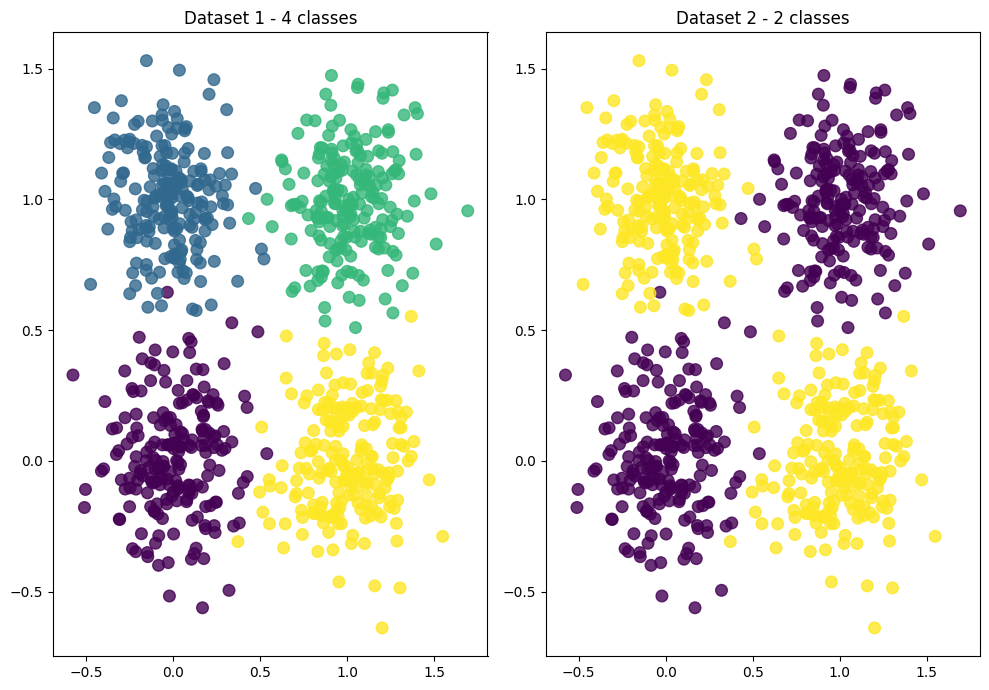

In [44]:
# plot the two generated datasets
fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y, alpha=0.8)

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin, alpha=0.8)

plt.tight_layout()

Extend the flipping to multiple gaussians

In [45]:
# we can use the np.mod() function again
n_classes = 4
y = np.random.choice(n_classes, size=10, replace=True) # generate random labels array
print(y)
y_flip = np.mod(y + 1, n_classes) # add 1 so that all labels actually change
print(y_flip)

[1 2 2 1 2 2 2 3 2 3]
[2 3 3 2 3 3 3 0 3 0]


In [46]:
# if we don't add 1 labels don't change
y_bad_flip = np.mod(y, n_classes)
print(y)
print(y_bad_flip)

[1 2 2 1 2 2 2 3 2 3]
[1 2 2 1 2 2 2 3 2 3]


In [66]:
def flipLabels_multipleGaussian(perc, Y):
    """
    Parameters
    ----------
    perc : float
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    # again we can use np.mod()
    n_classes = len(np.unique(y, return_counts=False))
    Y_noisy[idx_to_flip] = np.mod(Y_noisy[idx_to_flip] + 1, n_classes)
    if n_classes == 2:
      Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

The provided code defines a Python function called `flipLabels_multipleGaussian` that introduces noise into a set of class labels. This function is designed for multi-class classification tasks and introduces noise by flipping a specified percentage of class labels.

1. The code performs several checks on the input parameters to ensure they are valid and the operation can proceed safely.

2. A copy of the input labels array, `Y`, is created and stored in the variable `Y_noisy`.

3. The total number of data points, `n`, is determined based on the size of the `Y_noisy` array.

4. The number of labels to be flipped, `n_flips`, is calculated as an integer by flooring the result of `(n * perc / 100)`.

5. An array of random indices to flip, `idx_to_flip`, is generated using `np.random.choice(n, size=n_flips, replace=False)`.

6. The selected labels at the indices specified in `idx_to_flip` are flipped using the modulo operation `np.mod(Y_noisy[idx_to_flip] + 1, n_classes)`, where `n_classes` represents the number of unique classes in the `Y_noisy` array. This operation effectively rotates the class labels to introduce noise.

7. If the number of classes, `n_classes`, is equal to 2 (indicating a binary classification task), an additional step is performed: the labels are converted to their negative counterparts.

8. The function returns the modified `Y_noisy` array, which contains the labels with the introduced noise.

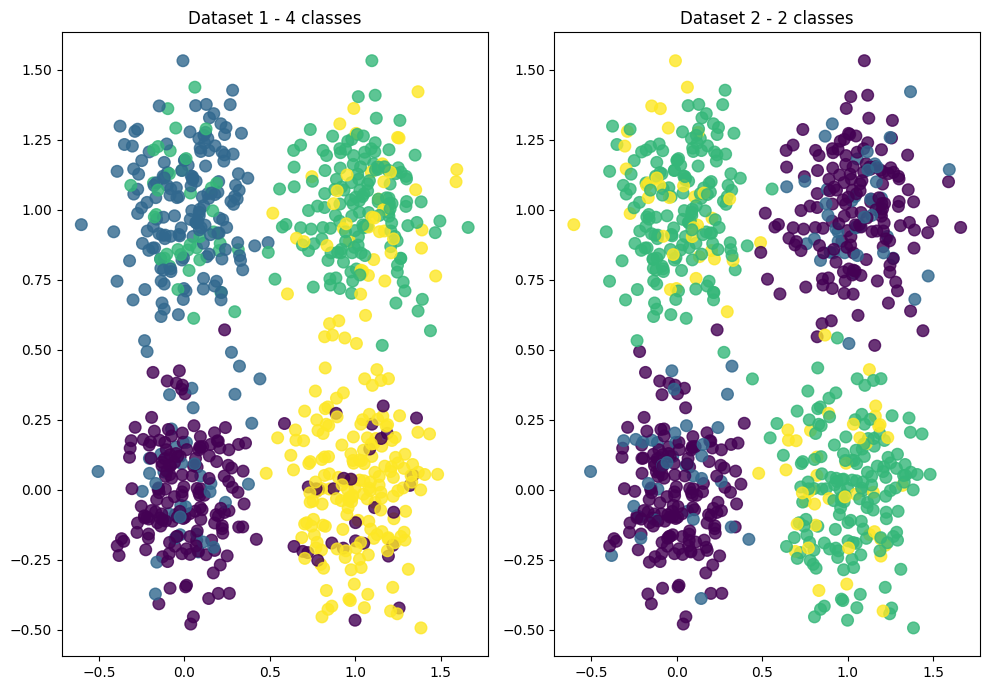

In [67]:
# example of usage
X, y = mixGauss(mu, sigma, 200)
y_bin = 2 * np.mod(y, 2) - 1
p = 20 # flip 20% of labels
y_noisy = flipLabels_multipleGaussian(p, y)
y_bin_noisy = flipLabels_multipleGaussian(p, y_bin)

# plot the two generated datasets
fig = plt.figure(figsize=(10,7))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y_noisy, alpha=0.8)

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin_noisy, alpha=0.8)

plt.tight_layout()